## We are predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Variable Information

### Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('student_scores - student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Observation: Spread of data in both variables seems high

### Describing and performing Exploratory Analysis

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Inference: Min standard deviation from mean by both the variables. Outliers must be checked.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#observation: Both intereger type variables

In [9]:
data.shape

(25, 2)

In [10]:
# very less number of data points with 25 observations and 2 aattributes

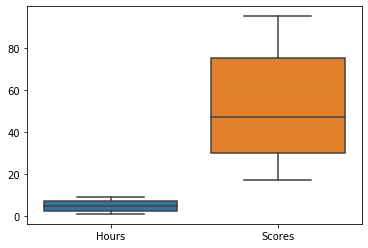

In [11]:
 sns.boxplot(data=data)

In [12]:
#Inference: Both independent and dependant variables have no outliers

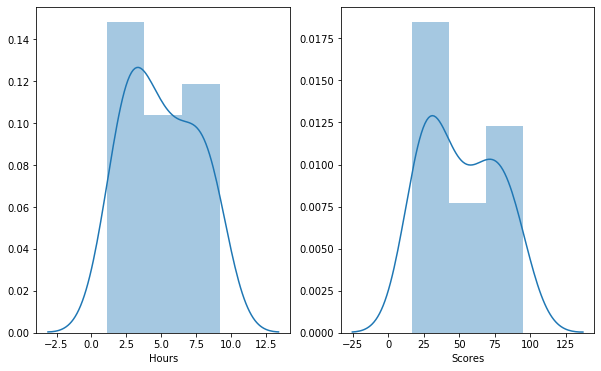

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.distplot(data.Hours, ax=ax[0])
sns.distplot(data.Scores, ax=ax[1])

In [14]:
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [15]:
#Inference: Both the variables are very lightly right skewed which might not affect model

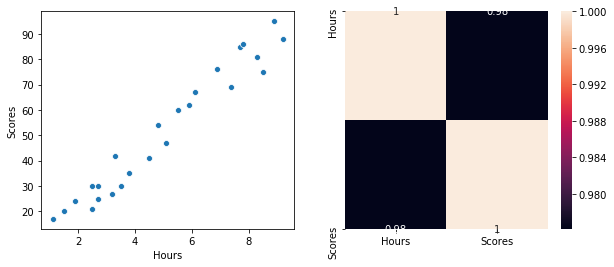

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(data.Hours,data.Scores, ax=ax[0])
sns.heatmap(data.corr(),annot=True, ax=ax[1])

In [17]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [18]:
#Inference: Both are higly correlated with each other and has linear characteristics

## Model evaluation

In [19]:
x=data['Hours']
y=data['Scores']
x=x.to_frame()

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
print("accuracy: ",r2_score(y_test, lr.predict(X_test)))
print("rmse: ",np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

accuracy:  0.9454906892105356
rmse:  4.6474476121003665


In [21]:
x_final=pd.DataFrame([9.25])
y_final=lr.predict(x_final)
y_final

array([93.69173249])

In [22]:
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=i)
    scoring = {'r_squared':'r2'}
    grid_parameters = [{}]
    kf=KFold(n_splits=5,random_state=18)
    LogReg=LinearRegression()
    gridsearch=GridSearchCV(LogReg, grid_parameters,cv=kf,scoring=scoring,refit='r_squared')
    gs=gridsearch.fit(X_train,y_train)
    results=gs.cv_results_
    if i==0:
        max1=r2_score(y_test, gs.predict(X_test))
    else:
        if r2_score(y_test, gs.predict(X_test))<max1:
            pass;
        else:
            max1=r2_score(y_test, gs.predict(X_test))
            print("accuracy: ",r2_score(y_test, gs.predict(X_test)))
            print("rmse: ",np.sqrt(mean_squared_error(y_test, gs.predict(X_test))))

accuracy:  0.9735538080811826
rmse:  4.938382360637607
accuracy:  0.9771327540131409
rmse:  4.932064637753766
accuracy:  0.9778064143884082
rmse:  4.148254878838061
accuracy:  0.9810815915350791
rmse:  3.941163544695737


In [25]:
y_pred=gs.predict(X_test)
dicty={'y actual':y_test, 'y predicted':y_pred}
finaldf=pd.DataFrame(dicty)
finaldf

,y actual,y predicted
10,85,77.086162
17,24,20.732389
12,41,45.994425
20,30,28.505323
21,54,48.909275


In [26]:
x_final=pd.DataFrame([9.25])
y_final=gs.predict(x_final)
y_final

array([92.14622244])

### Final conclusion, that a student studying for 9.25 hours might score 92.14 marks